In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)
a = housing.data
b = housing.target

In [3]:
a, b

(       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude  
 0    

In [4]:
a[b.name] = b.values

In [5]:
df = a.copy()
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [6]:
df.dtypes

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

In [7]:
for col in df.columns:
    print(col, df[col].dtype)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

MedInc float64
[8.3252 8.3014 7.2574 5.6431 3.8462]
12928

HouseAge float64
[41. 21. 52. 42. 50.]
52

AveRooms float64
[6.98412698 6.23813708 8.28813559 5.8173516  6.28185328]
19392

AveBedrms float64
[1.02380952 0.97188049 1.07344633 1.07305936 1.08108108]
14233

Population float64
[ 322. 2401.  496.  558.  565.]
3888

AveOccup float64
[2.55555556 2.10984183 2.80225989 2.54794521 2.18146718]
18841

Latitude float64
[37.88 37.86 37.85 37.84 37.83]
862

Longitude float64
[-122.23 -122.22 -122.24 -122.25 -122.26]
844

MedHouseVal float64
[4.526 3.585 3.521 3.413 3.422]
3842



In [8]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='MedHouseVal', ylabel='Count'>

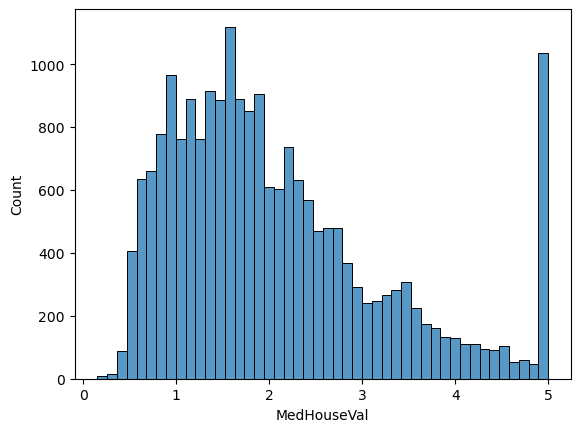

In [10]:
sns.histplot(df.MedHouseVal)

In [11]:
n = len(df)
n_test = int(0.2 * n)
n_val = int(0.2 * n)
n_train = n - n_test - n_val
n_train, n_test, n_val

(12384, 4128, 4128)

In [12]:
idx = np.arange(n)

In [13]:
np.random.seed(5)
np.random.shuffle(idx)
idx

array([14772, 10105, 20094, ..., 20463, 18638,  2915])

In [14]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [15]:
df_train.reset_index(drop=True)
df_val.reset_index(drop=True)
df_test.reset_index(drop=True)

len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [16]:
df_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
14772,2.7361,14.0,4.206612,0.983471,1224.0,3.371901,32.57,-117.07,0.936
10105,3.6106,18.0,4.393468,1.026439,1590.0,2.472784,33.92,-117.95,1.536
20094,2.1250,26.0,37.063492,7.185185,416.0,2.201058,38.19,-120.03,1.325
19261,2.6576,23.0,5.163004,1.120879,1644.0,3.010989,38.44,-122.74,1.479
14139,2.5583,31.0,4.606335,1.133484,1263.0,2.857466,32.75,-117.07,1.207
...,...,...,...,...,...,...,...,...,...
2675,3.4038,29.0,5.881443,1.134021,684.0,3.525773,32.99,-115.41,1.078
20179,2.9821,29.0,4.827160,1.037037,1815.0,2.800926,34.34,-119.22,1.757
13162,1.9405,36.0,4.925490,1.058824,910.0,3.568627,36.86,-121.40,1.454
10819,2.7500,5.0,3.889344,1.176230,497.0,2.036885,33.64,-117.92,2.250


In [17]:
df_train.MedInc.max()

15.0001

In [18]:
y_train = df_train.MedHouseVal.values
y_test = df_test.MedHouseVal.values
y_val = df_val.MedHouseVal.values

In [19]:
del df_train["MedHouseVal"]
del df_test["MedHouseVal"]
del df_val["MedHouseVal"]

In [20]:
df_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14772,2.7361,14.0,4.206612,0.983471,1224.0,3.371901,32.57,-117.07
10105,3.6106,18.0,4.393468,1.026439,1590.0,2.472784,33.92,-117.95
20094,2.1250,26.0,37.063492,7.185185,416.0,2.201058,38.19,-120.03
19261,2.6576,23.0,5.163004,1.120879,1644.0,3.010989,38.44,-122.74
14139,2.5583,31.0,4.606335,1.133484,1263.0,2.857466,32.75,-117.07
...,...,...,...,...,...,...,...,...
2675,3.4038,29.0,5.881443,1.134021,684.0,3.525773,32.99,-115.41
20179,2.9821,29.0,4.827160,1.037037,1815.0,2.800926,34.34,-119.22
13162,1.9405,36.0,4.925490,1.058824,910.0,3.568627,36.86,-121.40
10819,2.7500,5.0,3.889344,1.176230,497.0,2.036885,33.64,-117.92


In [27]:
base = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
     
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
     
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

def prepare_X(df):
    df_num = df.copy()
    df_num = df_num[base]

    # df_num.AveRooms = df_num.AveRooms.round().values
    # df_num.AveBedrms = df_num.AveBedrms.round().values
    # df_num.AveOccup = df_num.AveOccup.round().values

    X = df_num.values
    return X

base

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [28]:
X_train = df_train.values

w0, w = train_linear_regression(X_train, y_train)
w0, w

(np.float64(-36.92545428803775),
 array([ 4.41233538e-01,  1.02102454e-02, -1.09963314e-01,  7.13536910e-01,
         3.10117602e-07, -3.20564142e-03, -4.20942542e-01, -4.33365147e-01]))

In [29]:
y_pred = w0 + X_train.dot(w)
y_pred

array([1.67744782, 1.93034371, 1.2629999 , ..., 1.59564387, 1.68612276,
       0.48652713])

<Axes: ylabel='Count'>

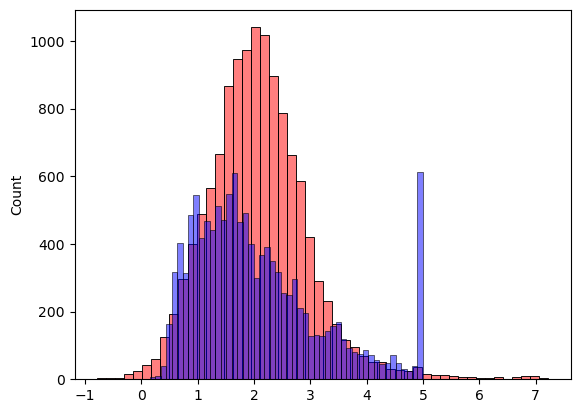

In [30]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [31]:
rmse(y_train, y_pred)

np.float64(0.7213030795859231)

In [32]:
# Training
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# Validating
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.725872105010729)